Predicting Car Prices

The goal of this project is to apply machine learning workflow to predict a car's market price using its attributes.  The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.



In [30]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [31]:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Our target column is the price column. Next we will select only the numeric columns.

In [32]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = cars[numeric_cols]

In [33]:
cars.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [35]:
# replacing ? with np.nan missing value and converting columns to numeric types

cars = cars.replace('?', np.nan)
cars = cars.astype('float')
cars.isnull().sum()



normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

41 rows have missing values for the normalized-losses column. We will replace these missing values with the mean for all the columns. And drop any rows that have a missing price value, because price is our target column.

In [36]:
cars = cars.fillna(cars.mean())
cars = cars.dropna(subset = ['price'])

In [37]:
# normalizing the values to range from 0 to 1 excpet our target column

price_col = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = price_col


We will create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.

Next we will use this function to train and test univariate models using the different numeric columns in the data set, and figure out which column performed the best using the default k value.

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()
                


    


engine-size          4244.103421
highway-mpg          4245.734567
curb-weight          4436.523561
width                5030.139338
city-mpg             5085.047194
horsepower           5092.272401
length               5418.778301
wheel-base           5743.877086
bore                 6746.031651
compression-rate     7177.202061
normalized-losses    7374.513274
height               7832.152833
peak-rpm             7965.541705
stroke               8096.653898
dtype: float64

From the above data we can see that engine-size and highway-mpg performed the  best with the least RMSE values at 4244.103421 and 4245.734567 respectively.

Lets modify the knn_train_test() function to accept a parameter for the k value
and test a univariate model using the following k values (1, 3, 5, 7, and 9). 

In [39]:

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    k_rmse_results[col] = rmse_val
k_rmse_results


{'bore': {1: 7930.548590614734,
  3: 6353.8909942494565,
  5: 6746.031650636273,
  7: 7246.705124103924,
  9: 7184.417703627346},
 'city-mpg': {1: 6449.848972168971,
  3: 4808.843642391777,
  5: 5085.0471938761675,
  7: 4958.158653064454,
  9: 5021.788908379828},
 'compression-rate': {1: 7255.772135357892,
  3: 7485.226183865361,
  5: 7177.202060550313,
  7: 7333.967327565648,
  9: 7426.77234607814},
 'curb-weight': {1: 5842.169653813219,
  3: 4527.849193303364,
  5: 4436.523561278551,
  7: 4320.057970537657,
  9: 4181.086220663609},
 'engine-size': {1: 4775.980594973188,
  3: 4211.354845313718,
  5: 4244.103420588581,
  7: 4028.227456215567,
  9: 4125.116174076774},
 'height': {1: 10653.050778292903,
  3: 8176.934988463841,
  5: 7832.152832500197,
  7: 7743.870132519971,
  9: 7632.665665042622},
 'highway-mpg': {1: 4445.090471315778,
  3: 4442.016315845971,
  5: 4245.734566600798,
  7: 4266.445995724475,
  9: 4522.647593669363},
 'horsepower': {1: 5261.091645623908,
  3: 4995.30290628

Visualize the results using a scatter plot or a line plot for the different K values

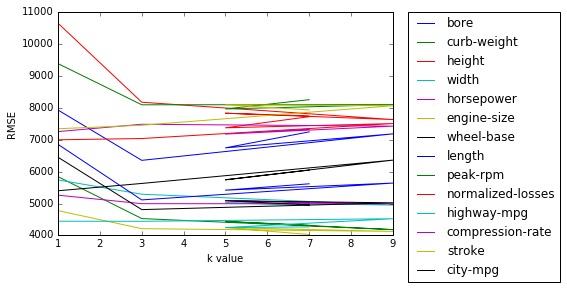

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
    



Next steps

The next step is to test using multivariate and K-fold cross validation models   to get the best predictions for car prices. 